<a href="https://colab.research.google.com/github/JuelGeorge/Adaptive_BCI_2D/blob/main/ErrPGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install tensorflow tensorflow-gpu matplotlib tensorflow-datasets ipywidgets


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 588.3 MB 1.3 MB/s eta 0:00:01
ERROR: Operation cancelled by user


asdf

In [1]:
import tensorflow as tf


In [3]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [2]:
# Bringing in tensorflow
import tensorflow as tf
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# Brining in tensorflow datasets for fashion mnist 
import tensorflow_datasets as tfds
# Bringing in matplotlib for viz stuff
from matplotlib import pyplot as plt

Some preliminary imports

In [4]:
# Bring in the sequential api for the generator and discriminator
from tensorflow.keras.models import Sequential
# Bring in the layers for the neural network
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Reshape, LeakyReLU, Dropout, UpSampling2D, UpSampling1D, Conv1D,Resizing, BatchNormalization, MaxPooling2D,ReLU,Softmax

Generator model-

In [5]:
def build_generator(): 
    model = Sequential()
    
    # Takes in random values and reshapes it to 7x7x128
    # Beginnings of a generated image
    model.add(Dense(1*4*64, input_dim=64))
    model.add(BatchNormalization())
    
    model.add(LeakyReLU(0.2))
    model.add(Reshape((1,4,64)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
    
    
    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
   
    
    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
   

    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())
  

    model.add(UpSampling2D(size=(1,2)))
    model.add(Conv2D(64,4,padding='same'))
    model.add(LeakyReLU(0.2))
    model.add(BatchNormalization())


    model.add(UpSampling2D(size=(1,2),))
    model.add(Conv2D(64,4,padding='same',activation='tanh'))
    model.add(BatchNormalization())
 
   
    return model

Instanstiate the generator model and view a layer by layer summary

In [ ]:
generator=build_generator()
generator.summary()

Generate 4 ErrP datasets. 64 Channels x 128 samples for each dataset.

First Errp Dataset, channel 2-

In [9]:
def build_discriminator(): 
    model1 = Sequential()
    
    model1.add(MaxPooling2D(pool_size=(2,32),input_shape = (1,128,64),padding='same'))
    model1.add(Conv2D(64,4,padding='same'))
   
   
    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())
    
    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())
    
    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())

    model1.add(UpSampling2D(size=(1,2)))
    model1.add(Conv2D(64,4,padding='same'))
    model1.add(LeakyReLU(0.2))
    model1.add(BatchNormalization())
    
    model1.add(Flatten())
    
    model1.add(Dense(128))
    model1.add(ReLU())

    model1.add(Dense(2))
    model1.add(Softmax())



   
    model1.build()
    return model1

In [10]:
discriminator = build_discriminator()
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 max_pooling2d (MaxPooling2D  (None, 1, 4, 64)         0         
 )                                                               
                                                                 
 conv2d_6 (Conv2D)           (None, 1, 4, 64)          65600     
                                                                 
 up_sampling2d_5 (UpSampling  (None, 1, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 1, 8, 64)          65600     
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 1, 8, 64)          0         
                                                                 
 batch_normalization_7 (Batc  (None, 1, 8, 64)        

In [11]:
import numpy as np

In [13]:

data=np.load('/content/errp326.npy')



In [14]:
newdata= list()
for i in data:
    newdata.append(np.resize(np.array(i.T),(1,128,64)))
newdata=np.array(newdata)

In [15]:
# Adam is going to be the optimizer for both
from tensorflow.keras.optimizers import Adam
# Binary cross entropy is going to be the loss for both 
from tensorflow.keras.losses import BinaryCrossentropy

In [16]:
g_opt = Adam(learning_rate=0.0001) 
d_opt = Adam(learning_rate=0.00001) 
g_loss = BinaryCrossentropy()
d_loss = BinaryCrossentropy()

In [17]:
from keras.models import Model

In [18]:
class ErrPGAN(Model): 
    def __init__(self, generator, discriminator, *args, **kwargs):
        # Pass through args and kwargs to base class 
        super().__init__(*args, **kwargs)
        
        # Create attributes for gen and disc
        self.generator = generator 
        self.discriminator = discriminator 
        
    def compile(self, g_opt, d_opt, g_loss, d_loss, *args, **kwargs): 
        # Compile with base class
        super().compile(*args, **kwargs)
        
        # Create attributes for losses and optimizers
        self.g_opt = g_opt
        self.d_opt = d_opt
        self.g_loss = g_loss
        self.d_loss = d_loss 

    def train_step(self, batch):
        # Get the data 
        real_images = batch
        fake_images = self.generator(tf.random.normal((79,64,1)), training=False)
        
        # Train the discriminator
        with tf.GradientTape() as d_tape: 
            # Pass the real and fake images to the discriminator model
            yhat_real = self.discriminator(real_images, training=True) 
            yhat_fake = self.discriminator(fake_images, training=True)
            yhat_realfake = tf.concat([yhat_real, yhat_fake], axis=0)
            
            # Create labels for real and fakes images
            y_realfake = tf.concat([tf.zeros_like(yhat_real), tf.ones_like(yhat_fake)], axis=0)
            
            # Add some noise to the TRUE outputs
            noise_real = 0.15*tf.random.uniform(tf.shape(yhat_real))
            noise_fake = -0.15*tf.random.uniform(tf.shape(yhat_fake))
            y_realfake += tf.concat([noise_real, noise_fake], axis=0)
            
            # Calculate loss - BINARYCROSS 
            total_d_loss = self.d_loss(y_realfake, yhat_realfake)
            
        # Apply backpropagation - nn learn 
        dgrad = d_tape.gradient(total_d_loss, self.discriminator.trainable_variables) 
        self.d_opt.apply_gradients(zip(dgrad, self.discriminator.trainable_variables))
        
        # Train the generator 
        with tf.GradientTape() as g_tape: 
            # Generate some new images
            gen_images = self.generator(tf.random.normal((79,64,1)), training=True)
                                        
            # Create the predicted labels
            predicted_labels = self.discriminator(gen_images, training=False)
                                        
            # Calculate loss - trick to training to fake out the discriminator
            total_g_loss = self.g_loss(tf.zeros_like(predicted_labels), predicted_labels) 
            
        # Apply backprop
        ggrad = g_tape.gradient(total_g_loss, self.generator.trainable_variables)
        self.g_opt.apply_gradients(zip(ggrad, self.generator.trainable_variables))
        
        return {"d_loss":total_d_loss, "g_loss":total_g_loss}

In [19]:
errpgan = ErrPGAN(generator, discriminator)

In [20]:
errpgan.compile(g_opt, d_opt, g_loss, d_loss)

In [21]:
import os
from tensorflow.keras.preprocessing.image import array_to_img
from tensorflow.keras.callbacks import Callback

In [22]:
img=list()

In [23]:
class ModelMonitor(Callback):
    def __init__(self, num_img=3, latent_dim=64):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.uniform((self.num_img, self.latent_dim,1))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img.append(generated_images[i])
           

In [ ]:
hist = errpgan.fit(newdata, epochs=2000, callbacks=[ModelMonitor()])

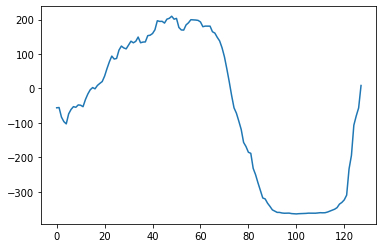

In [37]:
img[0].shape
errpwf=np.array(img[420]).T
plt.plot(errpwf[30])